In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
main_folder = '/ghds/cv19/analysis'
flowcell_id = '201120_NB552478_0005_AHHJLHBGXG'
path = os.path.join(main_folder, flowcell_id)
df = pd.read_csv(os.path.join(path, 'c19_call.hdr.tsv'), sep='\t')

In [3]:
df = df[df['sample_type'] == 'Sample']

df['row'] = df['pos_tube_rack'].str[14]
df['column'] = df['pos_tube_rack'].str.extract(r'.*?:[A-H](\d+)').astype('int')
df['RBP'] = df['pos_tube_rack'].str.extract(r'(.*?):.*$')

df['positive_detection'] = df['median_covid_ratio'].ge(0.01)
df['sample_count'] = 1


mapping1 = {'A':0, 'B':0,
           'C':500, 'D':500,
           'E':200, 'F':200,
           'G':100, 'H':100
            }

mapping2 = {'A':0, 'B':0,
           'C':100, 'D':100,
           'E':50, 'F':50,
           'G':25, 'H':25
            }

/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


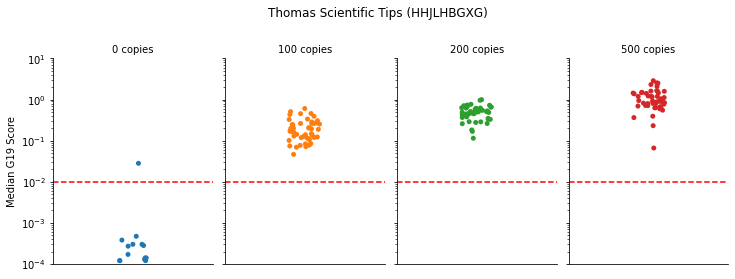

In [4]:
p1_2 = df[df['pos_tube_rack'].str.contains(('RBP201022A122|RBP201022A123'))]
p1_2['condition'] = p1_2['row'].map(mapping1)

g = sns.FacetGrid(p1_2, col='condition', hue='condition')
g.map(sns.stripplot, 'condition', 'median_covid_ratio').set(xticks=[], yscale='log', ylim=[0.0001, 10])
g.map(plt.axhline, y=0.01, ls='--', c='red')
g.set_titles(col_template="{col_name} copies")
g.set_axis_labels("", "Median G19 Score")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Thomas Scientific Tips (HHJLHBGXG)')

g.fig.set_figheight(4)
g.fig.set_figwidth(10)

In [5]:
p1_2.set_index('condition').median_covid_ratio.rename('% > 0.01').ge(0.01).groupby(
    level=0).value_counts(True).unstack(fill_value=0).iloc[:,[1]]

% > 0.01,True
condition,
0,0.022727
100,1.000000
200,1.000000
500,1.000000


/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


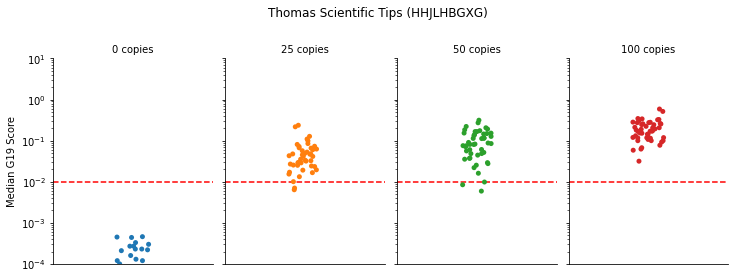

In [6]:
p3_4 = df[df['pos_tube_rack'].str.contains(('RBP201022A124|RBP201022A125'))]
p3_4['condition'] = p3_4['row'].map(mapping2)

g = sns.FacetGrid(p3_4, col='condition', hue='condition')
g.map(sns.stripplot, 'condition', 'median_covid_ratio').set(xticks=[], yscale='log', ylim=[0.0001, 10])
g.map(plt.axhline, y=0.01, ls='--', c='red')
g.set_titles(col_template="{col_name} copies")
g.set_axis_labels("", "Median G19 Score")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Thomas Scientific Tips (HHJLHBGXG)')

g.fig.set_figheight(4)
g.fig.set_figwidth(10)

In [7]:
p3_4.set_index('condition').median_covid_ratio.rename('% > 0.01').ge(0.01).groupby(
    level=0).value_counts(True).unstack(fill_value=0).iloc[:,[1]]

% > 0.01,True
condition,
0,0.0000
25,0.8750
50,0.9375
100,1.0000


## Nicer Looking Plots

/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/bshih/miniconda3/envs/c19dash/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


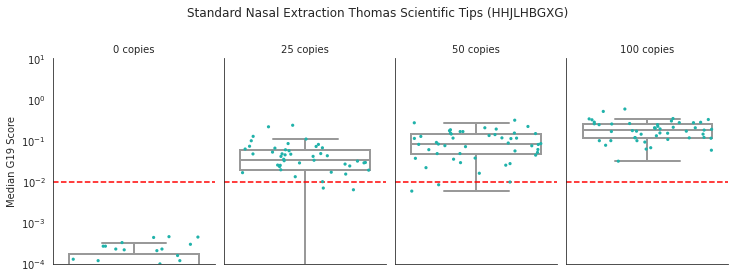

In [26]:
p3_4 = df[df['pos_tube_rack'].str.contains(('RBP201022A124|RBP201022A125'))]
p3_4['condition'] = p3_4['row'].map(mapping2)

sns.set_style('white')

g = sns.FacetGrid(p3_4, col='condition')

g.map(sns.boxplot, 'condition', 'median_covid_ratio', \
      showfliers=False, color='w', linewidth=2)
g.map(sns.stripplot, 'condition', 'median_covid_ratio', jitter=0.4, size=3.2, color='lightseagreen')\
    .set(xticks=[], yscale='log', ylim=[0.0001, 10])

g.map(plt.axhline, y=0.01, ls='--', c='red')
g.set_titles(col_template="{col_name} copies")
g.set_axis_labels("", "Median G19 Score")

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Standard Nasal Extraction Thomas Scientific Tips (HHJLHBGXG)')

g.fig.set_figheight(4)
g.fig.set_figwidth(10)

g.savefig('thomas standard', dpi=300)

In [25]:
p3_4_calls = pd.get_dummies(p3_4.call)
p3_4_passqc = pd.get_dummies(p3_4.flags)
p3_4 = pd.concat([p3_4, p3_4_calls, p3_4_passqc], axis=1)

p3_4.groupby('condition').agg({'detected':'sum',
                               'not_detected':'sum',
                               'pass':'sum',
                               'sample_count':'sum',
                               'median_covid_ratio':'mean',
                               'positive_detection':'mean'
                              }).rename(columns={'median_covid_ratio':'mean_g19score'})

,detected,not_detected,pass,sample_count,mean_g19score,positive_detection
condition,,,,,,
0,0,44,44,44,0.000092,0.0000
25,42,6,48,48,0.047777,0.8750
50,45,3,48,48,0.100320,0.9375
100,48,0,48,48,0.197754,1.0000
